# **PREDIKSI DIABETES PIMA INDIANS**

> Pada kasus ini menggunakan metode *Deep Learning* untuk membuat model prediksi.

## **Muat Data**

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style('darkgrid')

In [2]:
# muat data
# dataset belum memiliki header
header = ['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'outcome']
diabetes = pd.read_csv('/content/drive/MyDrive/Dataset/weekly_assignment_2_diabetes_prediction/pima-indians-diabetes.csv', names=header)

In [3]:
# tampilkan data
diabetes

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## ***Exploratory Data Analysis***

### Melihat informasei dataset

In [4]:
# informasi dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   preg_times      768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood_press     768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   pedigree        768 non-null    float64
 7   age             768 non-null    int64  
 8   outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> Dataset ini tidak memiliki *missing values* dan semua data adalah numerik sehingga tidak perlu *handling missing values* dan *encoding*.

In [5]:
# deskripsi statistik
diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# periksa missing values
diabetes.isnull().sum()

preg_times        0
glucose           0
blood_press       0
skin_thickness    0
insulin           0
BMI               0
pedigree          0
age               0
outcome           0
dtype: int64

> Terdapat kejanggalan seperti nilai maksimal berapa kali hamil sebanyak 17 kali, hal ini tidaklah masuk akal dan sangat jarang sekali terjadi. Kemudian tekanan darah minimal adalah 0 (nol) juga tidak masuk akal. Kemungkinan dataset ini memiliki beberapa *outlier* (data yang menyimpang) yang harus diperhatikan.

### Analisis menggunakan visualisasi

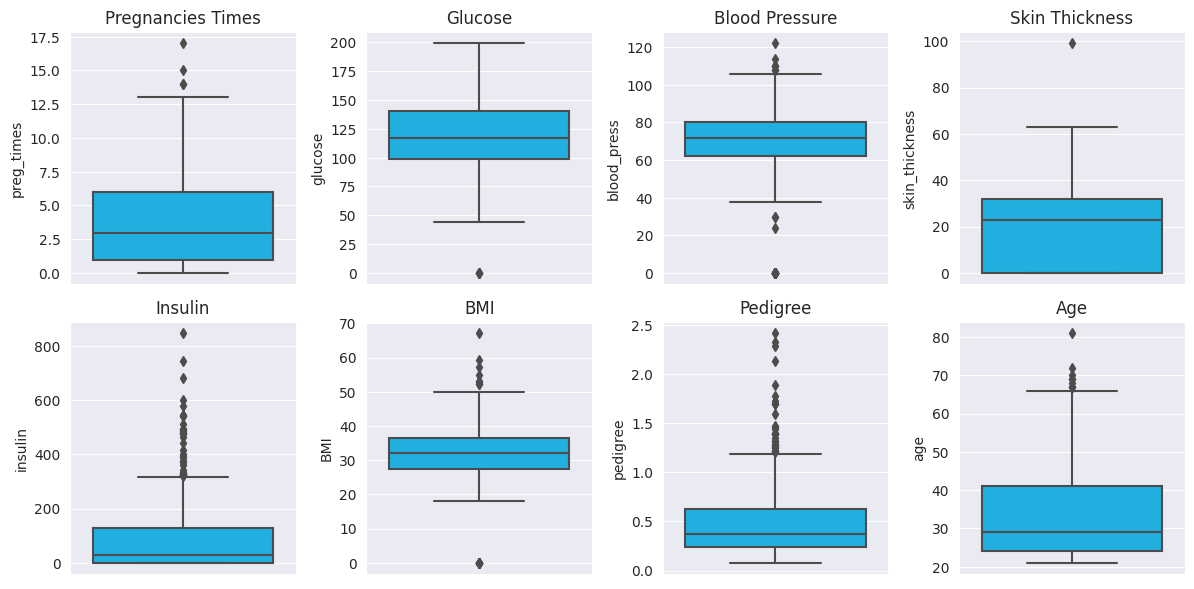

In [7]:
# memeriksa outlier

# menentukan ukuran layout plot
plt.figure(figsize=(12,6))

# subplot 1: preg_times
plt.subplot(2, 4, 1)
sns.boxplot(y='preg_times', data=diabetes, color='deepskyblue')
plt.title('Pregnancies Times')

# subplot 2: glucose
plt.subplot(2, 4, 2)
sns.boxplot(y='glucose', data=diabetes, color='deepskyblue')
plt.title('Glucose')

# subplot 3: blood_press
plt.subplot(2, 4, 3)
sns.boxplot(y='blood_press', data=diabetes, color='deepskyblue')
plt.title('Blood Pressure')

# subplot 4: skin_thickness
plt.subplot(2, 4, 4)
sns.boxplot(y='skin_thickness', data=diabetes, color='deepskyblue')
plt.title('Skin Thickness')

# subplot 5: insulin
plt.subplot(2, 4, 5)
sns.boxplot(y='insulin', data=diabetes, color='deepskyblue')
plt.title('Insulin')

# subplot 6: BMI
plt.subplot(2, 4, 6)
sns.boxplot(y='BMI', data=diabetes, color='deepskyblue')
plt.title('BMI')

# subplot 7: pedigree
plt.subplot(2, 4, 7)
sns.boxplot(y='pedigree', data=diabetes, color='deepskyblue')
plt.title('Pedigree')

# subplot 8: age
plt.subplot(2, 4, 8)
sns.boxplot(y='age', data=diabetes, color='deepskyblue')
plt.title('Age')

# penyesuaian tata letak
plt.tight_layout()

# tampilkan grafik
plt.show()

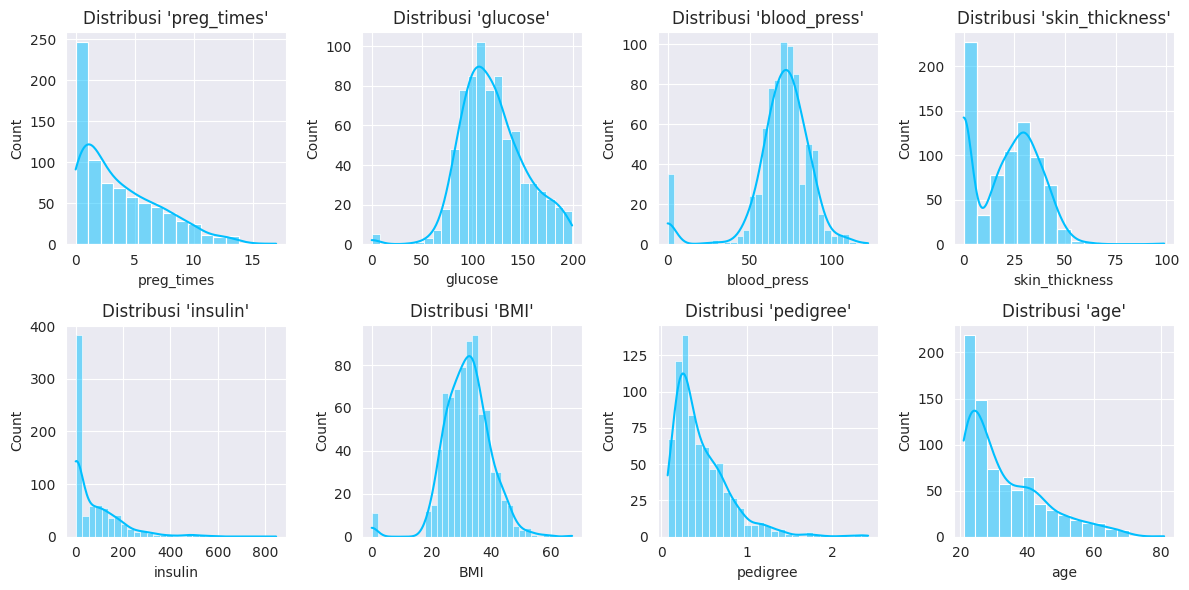

In [8]:
# melihat distribusi setiap data

# Mengatur tata letak
plt.figure(figsize=(12, 6))

# Iterasi melalui setiap atribut kecuali kolom "Outcome"
for i, col in enumerate(header[:-1], 1):
    plt.subplot(2, 4, i)  # Membuat subplot
    sns.histplot(x=diabetes[col], kde=True, color='deepskyblue')  # Plot histogram dengan KDE
    plt.title(f"Distribusi '{col}'")

# Menyesuaikan tata letak
plt.tight_layout()

# Menampilkan plot
plt.show()

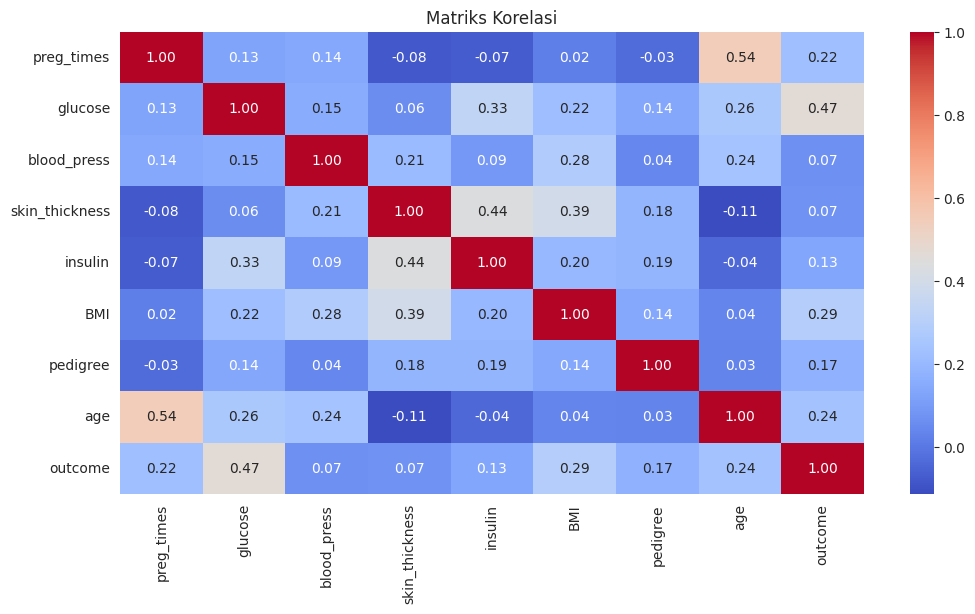

In [9]:
# melihat hubungan setiap variabel menggunakan heatmap

# Mengatur tata letak
plt.figure(figsize=(12, 6))

# heatmap
matriks_korelasi = diabetes.corr()
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')

# menampilkan plot
plt.show()

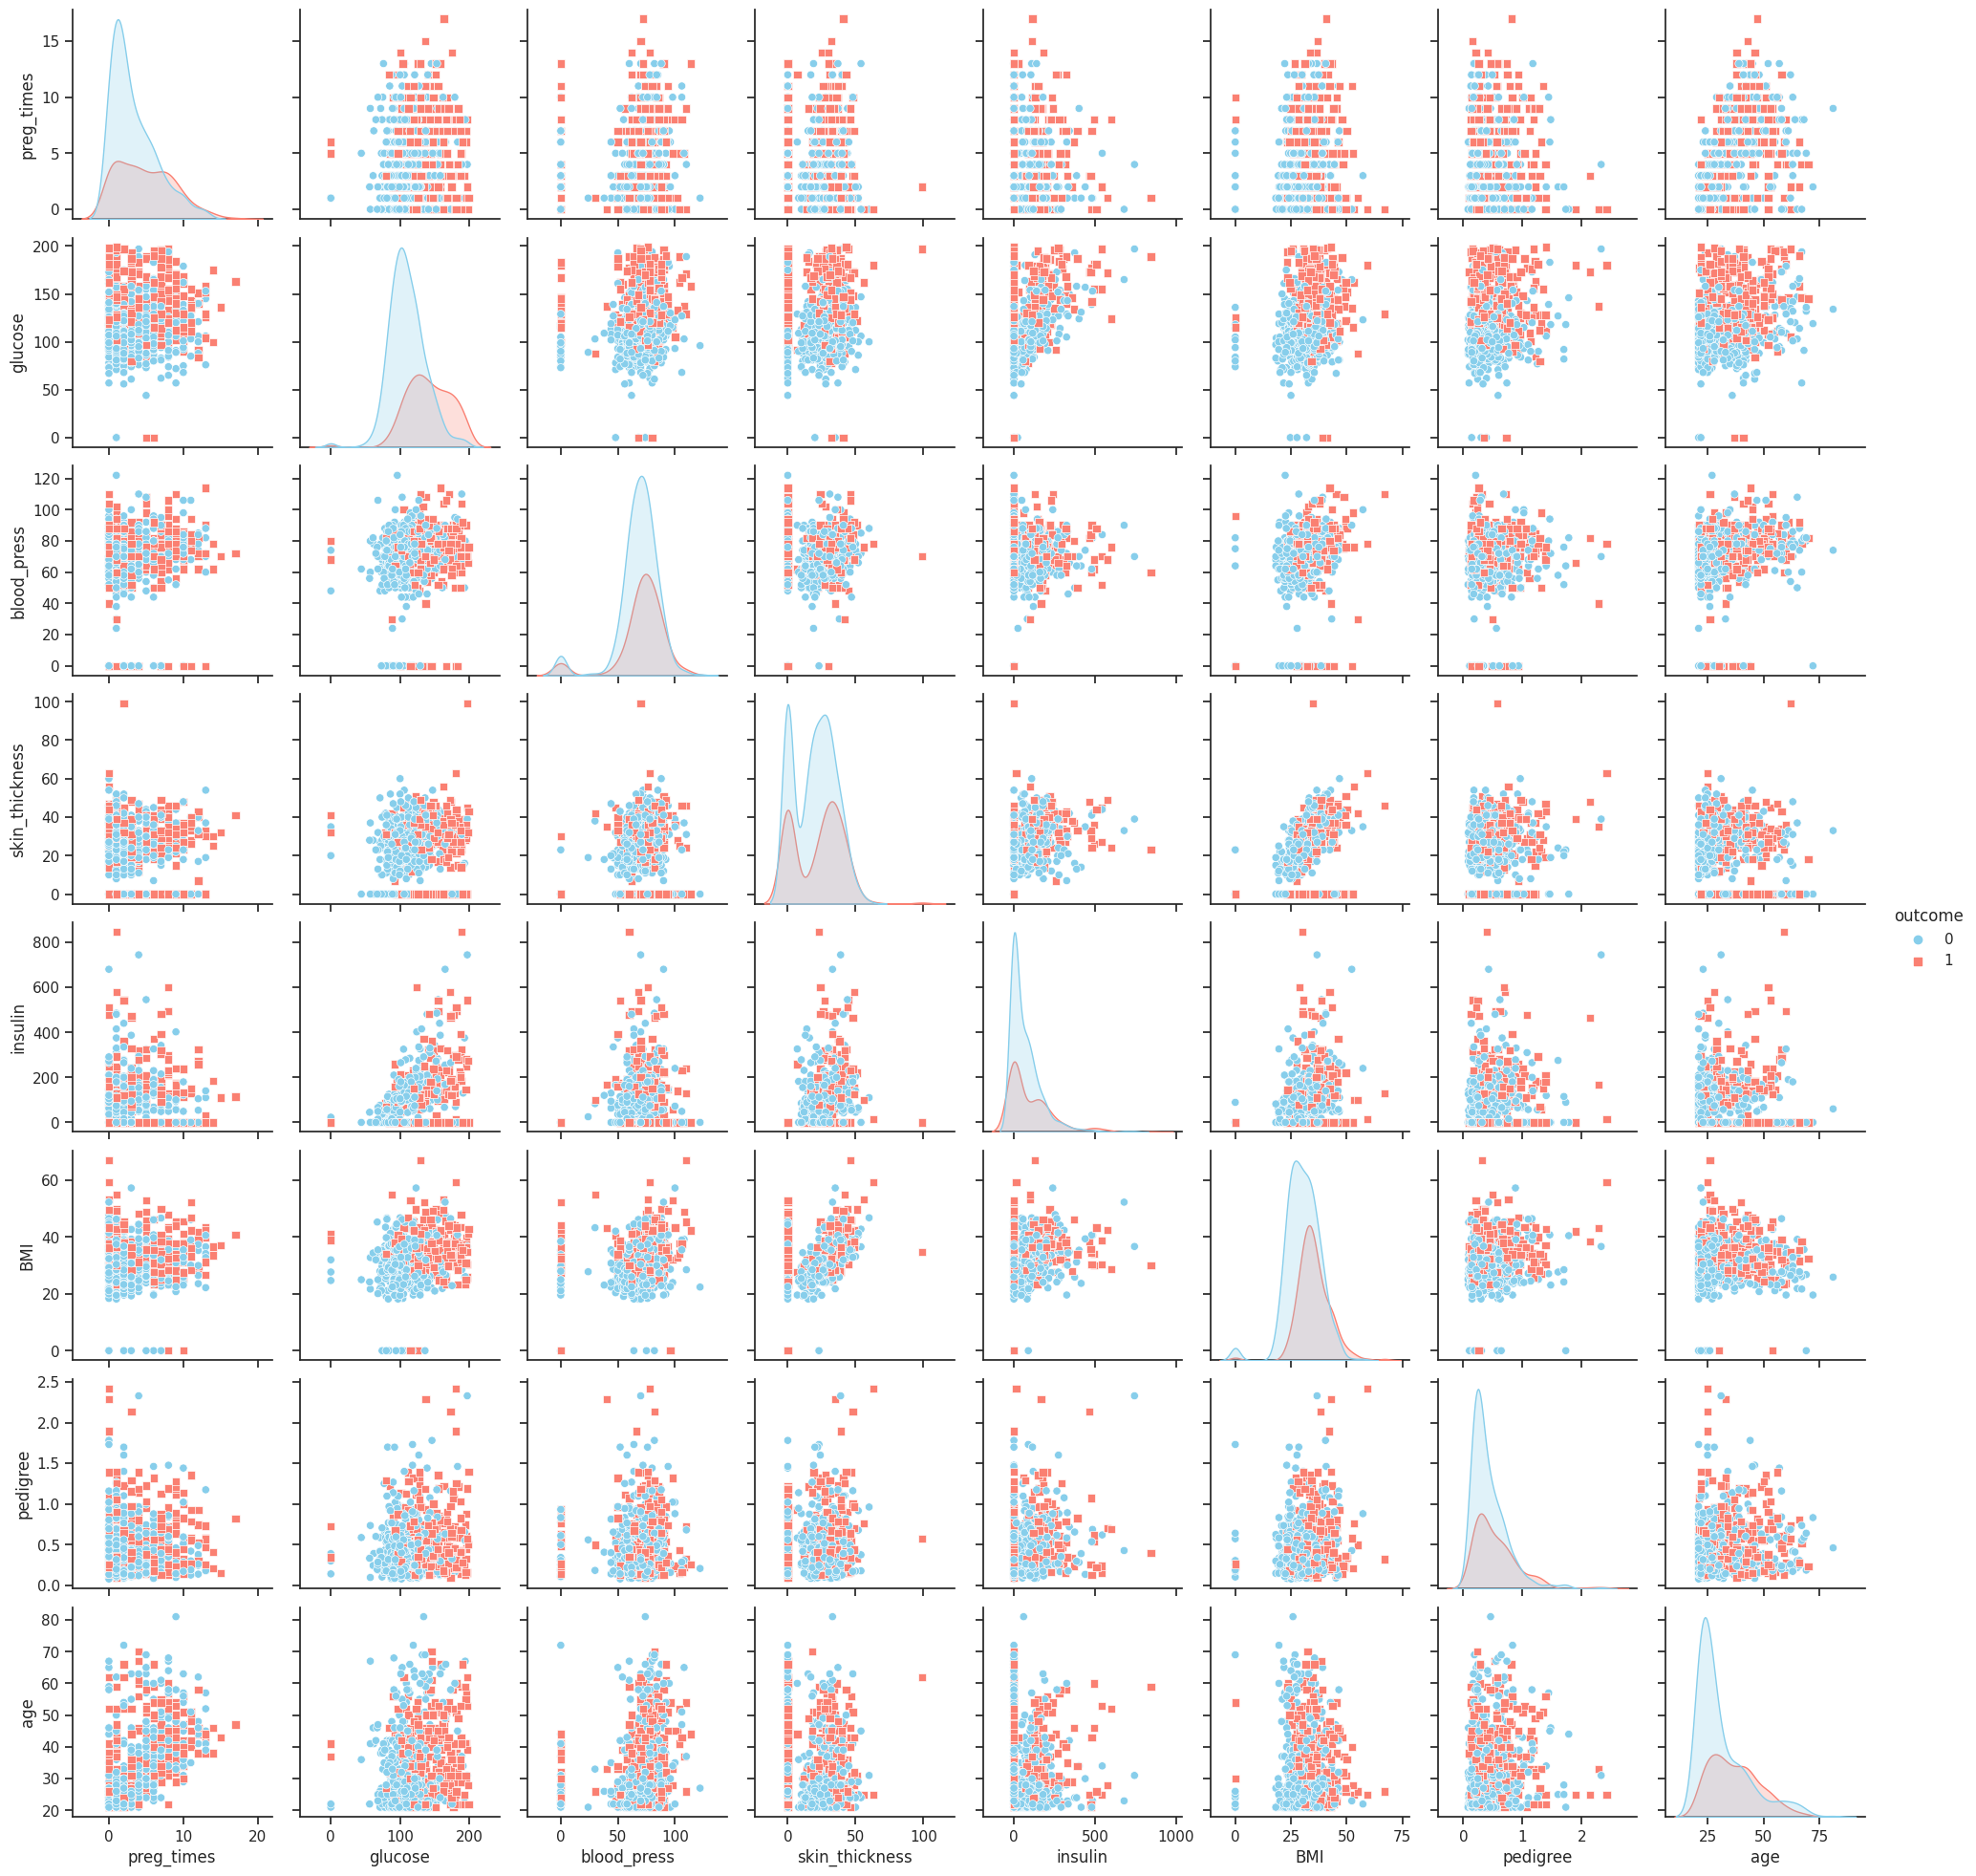

In [10]:
# melihat hubungan setiap variabel menggunakan pairplot

# mengatur ukuran plot
# plt.figure(figsize=(12,6))

# pairplot
sns.set(style='ticks')
sns.pairplot(diabetes, hue='outcome', markers=['o', 's'], palette={0: 'skyblue', 1: 'salmon'})

# menampilkan plot
plt.show()

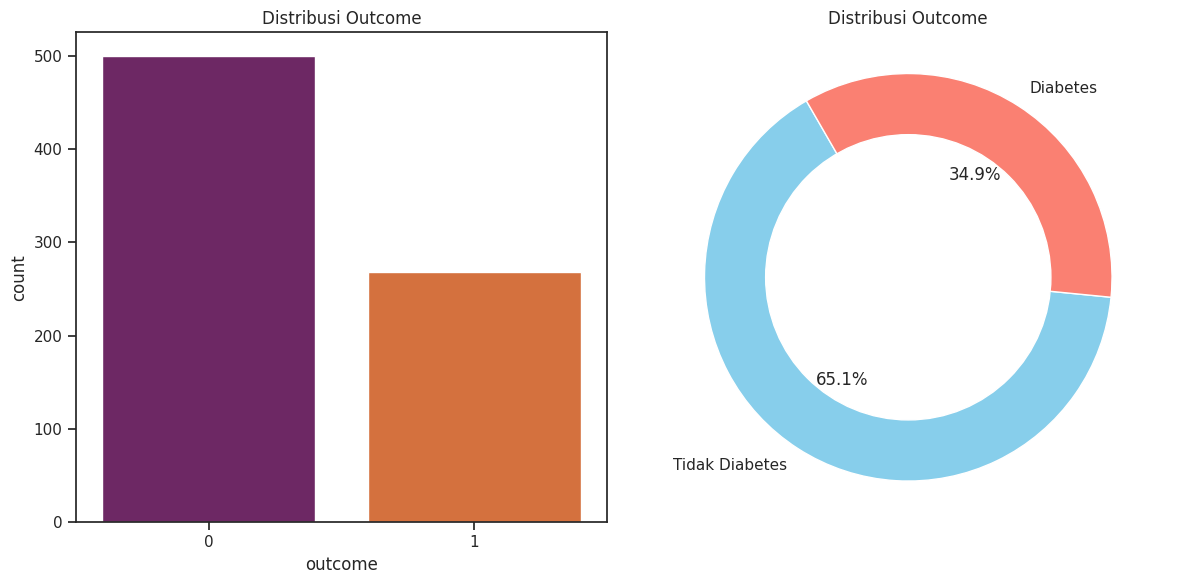

In [11]:
# melihat distribusi data outcome
plt.figure(figsize=(12,6))

# subplot 1: countplot
plt.subplot(1, 2, 1)
sns.countplot(x='outcome', data=diabetes, palette='inferno')
plt.title('Distribusi Outcome')

# subplot 2: pie plot
plt.subplot(1, 2, 2)
outcome_count = diabetes['outcome'].value_counts()
plt.pie(outcome_count, labels=['Tidak Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=120, colors=['skyblue', 'salmon'])

# Menambahkan lingkaran tengah (Opsional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Menambahkan judul
plt.title('Distribusi Outcome')

# Menampilkan plot
plt.axis('equal')
plt.tight_layout()
plt.show()

> Dari analisis visualisasi yang sudah dilakukan, ternyata terdapat *outlier* pada setiap data variabel bebas (*feature*). Selain itu, beberapa *feature* tidak berdistribusi normal. Data target (*label*) yaitu "outcome" memiliki distribusi 65,1% tidak diabetes dan 34,9% diabetes. Dari distribusi ini menunjukkan data target tidak seimbang (*imbalance*). Mungkin dapat dicoba untuk memanupulasi data yang memiliki *outlier*.

### Manipulasi data (*outliers handling*)

> Ada literatur yang menyatakan bahwa model *Deep Learning* dapat menghadapi *outliers*. Dengan demikian, tahap manipulasi data ini sementara dilewati terlebih dahulu.
 ___

## ***Deep Learning Model***

In [12]:
# import library
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

### *Split* dataset

In [13]:
x = diabetes.values[:, :8] # features
y = diabetes.values[:, 8:] # labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

### *Deep learning - feedforward*

In [14]:
# menerapkan model sequential dari keras
model = Sequential()

# membangun arsitektur MLP
model.add(Dense(12, input_dim=8, activation='relu')) # layer input + hidden layer pertama
model.add(Dense(6, activation='relu')) # hidden layer kedua
# model.add(Dense(6, activation='relu')) # hidden layer ketiga
model.add(Dense(1, activation='sigmoid')) # satu layer output

# ringkasan model
model.summary()

# kompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model keras pada dataset dipisah menjadi data latih (80%) dan data validasi (20%)
model.fit(X_train, y_train, validation_split=0.2, epochs=75, batch_size=4)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/75
123/123 [==============================] - 2s 6ms/step - loss: 18.0452 - accuracy: 0.6090 - val_loss: 2.3001 - val_accuracy: 0.4390
Epoch 2/75
123/123 [==============================] - 0s 4ms/step - loss: 1.9717 - accuracy: 0.4827 - val_loss: 1.4622 - val_accuracy: 0.55

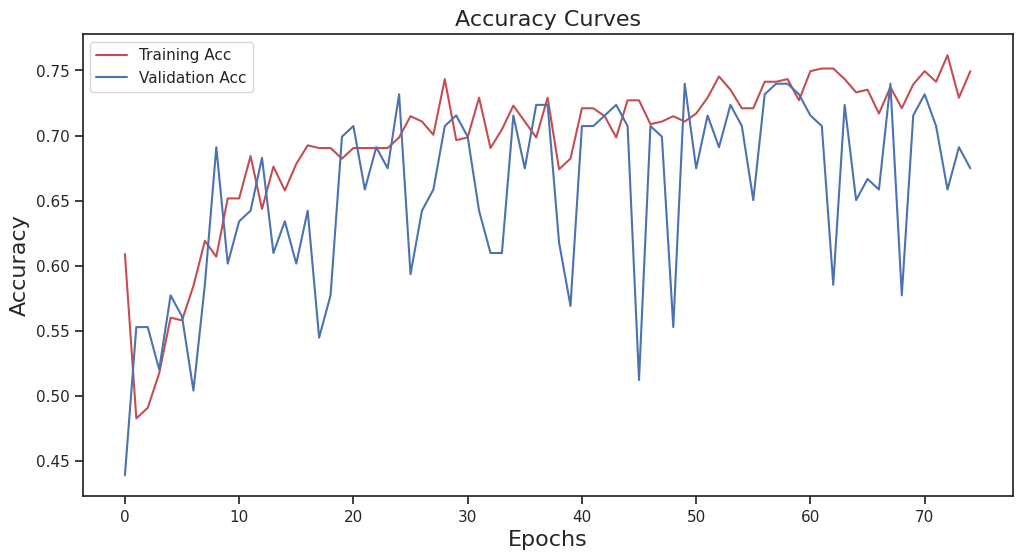

In [15]:
# visualisasi kurva akurasi hasil
plt.figure(figsize=[12,6])
plt.plot(model.history.history['accuracy'], 'r')
plt.plot(model.history.history['val_accuracy'], 'b')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [16]:
# evaluasi model keras menggunakan data testing
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f"Accuracy: {accuracy*100: .2f}%")

Accuracy:  66.88%


### *Deep learning - backpropagation*

In [17]:
# import library
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf

In [18]:
# Prepare the data
X = diabetes.values[:, :8] # features
y = diabetes.values[:, 8] # labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Membuat model sequential
model = Sequential()

# Menambahkan layer input dan hidden layer
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Mengompilasi model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=64, batch_size=8, verbose=1)

# Mengevaluasi model
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/64
77/77 [==============================] - 2s 7ms/step - loss: 14.0443 - accuracy: 0.5212 - val_loss: 1.4451 - val_accuracy: 0.6688
Epoch 2/64
77/77 [==============================] - 0s 4ms/step - loss: 8.4610 - accuracy: 0.5782 - val_loss: 3.2545 - val_accuracy: 0.6429
Epoch 3/64
77/77 [==============================] - 0s 4ms/step - loss: 5.8614 - accuracy: 0.5700 - val_loss: 1.3937 - val_accuracy: 0.6494
Epoch 4/64
77/77 [==============================] - 0s 5ms/step - loss: 4.5041 - accuracy: 0.5391 - val_loss: 0.9214 - val_accuracy: 0.6818
Epoch 5/64
77/77 [==============================] - 0s 4ms/step - loss: 3.5116 - accuracy: 0.5619 - val_loss: 0.7062 - val_accuracy: 0.6818
Epoch 6/64
77/77 [==============================] - 0s 4ms/step - loss: 2.7543 - accuracy: 0.5749 - val_loss: 0.6689 - val_accuracy: 0.6494
Epoch 7/64
77/77 [==============================] - 0s 4ms/step - loss: 2.3766 - accuracy: 0.5261 - val_loss: 0.6728 - val_accuracy: 0.6558
Epoch 8/64
77/77 [=

### *Deep learning - bayesian optimization*

In [20]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

In [21]:
# Fungsi objektif (objective function) untuk Bayesian Optimization
def objective(learning_rate, num_units1, num_units2, num_units3, num_units4, dropout_rate):

    # Membuat model sequential
    model = Sequential()

    # Menambahkan layer input dan hidden layer
    model.add(Dense(int(num_units1), input_dim=8, activation='relu'))
    model.add(Dense(int(num_units2), activation='relu'))
    model.add(Dense(int(num_units3), activation='relu'))
    model.add(Dense(int(num_units4), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Mengompilasi model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Melatih model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=64, batch_size=16, verbose=0)

    # Evaluasi model
    val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)

    # Mengembalikan akurasi pada data validasi
    return val_acc

# Rentang hyperparameter yang akan dioptimalkan
pbounds = {'learning_rate': (0.001, 0.01),
           'num_units1': (16, 64),
           'num_units2': (16, 64),
           'num_units3': (16, 64),
           'num_units4': (16, 64),
           'dropout_rate': (0.1, 0.5)}

# Inisialisasi Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=1, verbose=2)

# Mulai proses optimisasi
optimizer.maximize(init_points=5, n_iter=15)

# Menampilkan hasil optimal
print("Hasil optimal:")
print(optimizer.max)

|   iter    |  target   | dropou... | learni... | num_un... | num_un... | num_un... | num_un... |
-------------------------------------------------------------------------------------------------
| 1         | 0.7273    | 0.2668    | 0.007483  | 16.01     | 30.51     | 23.04     | 20.43     |
| 2         | 0.7013    | 0.1745    | 0.00411   | 35.04     | 41.86     | 36.12     | 48.89     |
| 3         | 0.7532    | 0.1818    | 0.008903  | 17.31     | 48.18     | 36.03     | 42.82     |
| 4         | 0.7143    | 0.1562    | 0.002783  | 54.44     | 62.48     | 31.04     | 49.23     |
| 5         | 0.7468    | 0.4506    | 0.009051  | 20.08     | 17.87     | 24.15     | 58.15     |
| 6         | 0.7597    | 0.1186    | 0.006928  | 16.71     | 51.64     | 36.19     | 41.63     |
| 7         | 0.7208    | 0.2666    | 0.01      | 16.0      | 54.94     | 44.28     | 32.31     |
| 8         | 0.7078    | 0.1       | 0.0045    | 16.0      | 54.26     | 30.3      | 44.89     |
| 9         | 0.7532

## Kesimpulan

> Pada bagian akhir ini disimpulkan menggunakan beberapa evaluasi metrik terhadap model yang telah dibuat antara lain *accuracy, precision, recall, f1 score*, dan *confusion matrix*.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# callback model arsitektur deep learning yang sudah dioptimasi

# Membuat model sequential
model = Sequential()

# Menambahkan layer input dan hidden layer
model.add(Dense(35, input_dim=8, activation='relu'))
model.add(Dense(58, activation='relu'))
model.add(Dense(54, activation='relu'))
model.add(Dense(51, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Mengompilasi model
optimizer = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=64, batch_size=16, verbose=0)

# Evaluasi model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)

# Evaluasi metriks data testing
y_pred = model.predict(X_test)
y_pred = np.round(y_pred) # karena klasifikasi maka harus dibulatkan sehingga menjadi 0 atau 1

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Menampilkan metrik evaluasi data testing
print(f'Accuracy Data Testing: {accuracy*100:.2f}%')
print(f'Precision Data Testing: {precision*100:.2f}%')
print(f'Recall Data Testing: {recall*100:.2f}%')
print(f'F1 Score Data Testing: {f1*100:.2f}%')
print('Confusion Matrix Data Testing:')
print(confusion_mat)

5/5 [==============================] - 0s 4ms/step
Accuracy Data Testing: 73.38%
Precision Data Testing: 79.17%
Recall Data Testing: 34.55%
F1 Score Data Testing: 48.10%
Confusion Matrix Data Testing:
[[94  5]
 [36 19]]


In [23]:
# menampilkan confusion matrix menggunakan tensorflow
import tensorflow as tf
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
conf_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[94,  5],
       [36, 19]], dtype=int32)>

In [24]:
print(val_acc) # akurasi dari evaluasi keras
print(accuracy) # akurasi dari evaluasi sklearn

0.7337662577629089
0.7337662337662337


> Masukan presentasi *weekly assignment* 2: coba menggunakan metode *oversampling* dan *undersampling* untuk mengatasi data *imbalance*. Jangan lupa berikan presentasi kesimpulan sebagai penutup.